# Fake News Classification

#### Fake news classification is a process that involves analyzing news content to determine its truthfulness. The ultimate goal of this project is to build a reliable and efficient algorithm that can accurately classify news articles as either fake or genuine, and thus help users make informed decisions when consuming information online. In this we use different machine learning models to classify the news.



#### Dataset: https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import accuracy_score
from joblib import dump,load

import warnings 
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [10]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv",index=False)

## Merging True and Fake Dataframes

In [14]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.sample(10)

,title,text,subject,date,class
4026,U.S. Senate confirms Acosta to head Labor Depa...,WASHINGTON (Reuters) - R. Alexander Acosta was...,politicsNews,"April 27, 2017",1
17251,A young Chinese rebel feels the pull of family...,"CHENGDU, China (Reuters) - Her stepfather was ...",worldnews,"October 17, 2017",1
5340,Trump supports free press but will call out fa...,BRUSSELS (Reuters) - U.S. President Donald Tru...,politicsNews,"February 20, 2017",1
10255,Anti-Trump protesters block Arizona road; marc...,(Reuters) - Demonstrators briefly shut down an...,politicsNews,"March 19, 2016",1
14399,U.N. urges Japan to resettle more refugees aft...,TOKYO (Reuters) - The U.N. refugee agency has ...,worldnews,"November 20, 2017",1
19449,"Turkey, Iran, Iraq consider counter-measures o...","ANKARA (Reuters) - Turkey, Iran and Iraq have ...",worldnews,"September 21, 2017",1
9024,Ryan says Democratic 'sit-in' demanding gun co...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"June 22, 2016",1
12336,Mexico Senate committees pass controversial se...,MEXICO CITY (Reuters) - Mexican Senate committ...,worldnews,"December 14, 2017",1
19196,MAXINE WATERS TELLS THE “GREATEST DESIRE” FOR ...,"Congresswoman @MaxineWaters, on working with P...",left-news,"Feb 4, 2017",0
18044,Is North Korea’s Kim Jong-un Considering Using...,What will he think of next? Is Kim Jong-un is ...,left-news,"Aug 28, 2017",0


In [15]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [16]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [17]:
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21402,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1
21403,WASHINGTON (Reuters) - The United States sugge...,1
21404,WASHINGTON (Reuters) - The United States has d...,1
21405,ISLAMABAD (Reuters) - Outlining a new strategy...,1


In [18]:
df.isnull().sum()

text     0
class    0
dtype: int64

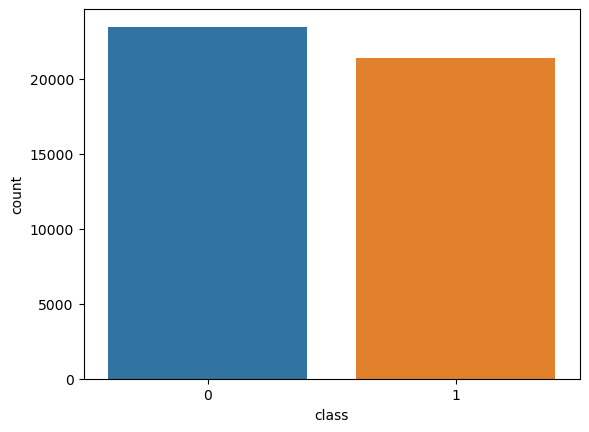

In [19]:
sns.countplot(x=df['class'])
plt.show()

## Random Shuffling the dataframe

In [20]:
df = df.sample(frac = 1)

In [21]:
df.head()

,text,class
21781,Medal of Honor recipient @Dakota_Meyer asking...,0
9480,WASHINGTON (Reuters) - Infighting dogged the D...,1
12110,Larry Lindsey fought hard for Trump in Colorad...,0
20421,This is not the first time Putin has warned th...,0
8860,In the first year of President Obama s term in...,0


In [22]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [23]:
df.columns

Index(['text', 'class'], dtype='object')

In [24]:
df.head()

,text,class
0,Medal of Honor recipient @Dakota_Meyer asking...,0
1,WASHINGTON (Reuters) - Infighting dogged the D...,1
2,Larry Lindsey fought hard for Trump in Colorad...,0
3,This is not the first time Putin has warned th...,0
4,In the first year of President Obama s term in...,0


## Creating a function to process the texts

In [25]:
def wordopt(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove digits
    text = re.sub(r'\d', '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    return text


In [26]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [27]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=123)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.50,random_state=123)

x_train.to_csv("Data/x_train.csv",index=False)
x_test.to_csv("Data/x_test.csv",index=False)
y_train.to_csv("Data/y_train.csv",index=False)
x_test.to_csv("Data/y_test.csv",index=False)
x_val.to_csv("Data/x_val.csv",index=False)
y_val.to_csv("Data/y_val.csv",index=False)


In [29]:
print(x_train.shape,x_test.shape,x_val.shape,y_train.shape,y_test.shape,y_val.shape)

(31414,) (6732,) (6732,) (31414,) (6732,) (6732,)


In [30]:
x_train

28698    washington reuters  us president barack obama ...
1402     two hypocrite climate change freaks decided to...
32063    it s trump s third month in office and the lie...
2730     donald trump kicked off hispanic heritage mont...
32964    america has a very ugly history with regards t...
                               ...                        
7763     some of the key regulations are thought to be ...
15377    leaked documents from george soros  open socie...
17730                         warningthis video is graphic
28030    the fast food industry has been warning those ...
15725    liberals on twitter just can t find enough rea...
Name: text, Length: 31414, dtype: object

In [31]:
x_test

19710    moscow reuters  russian communications watchdo...
44669     patrick henningsen st century wirejudging by ...
27397    a russian man wanted by the justice department...
3199     beijing reuters  us gas exporters and traders ...
19738    unless you ve been living under a rock for the...
                               ...                        
7755     what started as a prank to annoy trump support...
29729    has their ever been a more vengeful and hatefu...
24312    brasilia reuters  a brazilian appeals court on...
4942     washington reuters  us senator john mccain sai...
18194    on monday jimmy kimmel mercilessly mocked sara...
Name: text, Length: 6732, dtype: object

## Convert text to vectors

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [33]:
xv_test

<6732x175011 sparse matrix of type '<class 'numpy.float64'>'
	with 1345895 stored elements in Compressed Sparse Row format>

In [34]:
df

,text,class
0,medal of honor recipient dakota_meyer asking ...,0
1,washington reuters infighting dogged the demo...,1
2,larry lindsey fought hard for trump in colorad...,0
3,this is not the first time putin has warned th...,0
4,in the first year of president obama s term in...,0
...,...,...
44873,a trio of neonazi confederate flagwaving white...,0
44874,berlin reuters german chancellor angela merke...,1
44875,washington reuters a bipartisan group of law...,1
44876,new york city begs to differ of course this is...,0


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)
print('train score: ',LR.score(xv_train,y_train)*100)

train score:  99.24874259884128


In [36]:
dump(LR,'logistic_regression.pkl')

['logistic_regression.pkl']

In [37]:
pred_lr=LR.predict(xv_test)

In [38]:
pred_lr

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [39]:
LR_accuracy= LR.score(xv_test, y_test)
print("Accuracy:", LR_accuracy*100)

Accuracy: 98.88591800356507


In [40]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3575
           1       0.99      0.99      0.99      3157

    accuracy                           0.99      6732
   macro avg       0.99      0.99      0.99      6732
weighted avg       0.99      0.99      0.99      6732



## Decision Tree Classification

In [41]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
print('train score: ',DT.score(xv_train,y_train)*100)

train score:  100.0


In [42]:
dump(DT,'DT.pkl')

['DT.pkl']

In [43]:
pred_dt = DT.predict(xv_test)

In [46]:
pred_dt

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [44]:
DT_accuracy = DT.score(xv_test, y_test)
print("Accuracy:", DT_accuracy*100)

Accuracy: 99.62863933452168


In [45]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      3157

    accuracy                           1.00      6732
   macro avg       1.00      1.00      1.00      6732
weighted avg       1.00      1.00      1.00      6732



## Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
print('train score: ',GBC.score(xv_train,y_train)*100)

train score:  99.653020946075


In [48]:
dump(GBC,'GBC.pkl')

['GBC.pkl']

In [49]:
pred_gbc = GBC.predict(xv_test)

In [50]:
GBC_accuracy= GBC.score(xv_test, y_test)
print("Accuracy:", GBC_accuracy*100)

Accuracy: 99.62863933452168


In [51]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3575
           1       0.99      1.00      1.00      3157

    accuracy                           1.00      6732
   macro avg       1.00      1.00      1.00      6732
weighted avg       1.00      1.00      1.00      6732



## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
print('train score: ',RFC.score(xv_train,y_train)*100)

train score:  100.0


In [53]:
dump(RFC,'RFC.pkl')

['RFC.pkl']

In [54]:
pred_rfc = RFC.predict(xv_test)

In [55]:
RFC_accuracy = RFC.score(xv_test, y_test)
print("Accuracy:", RFC_accuracy*100)

Accuracy: 98.90077243018419


In [56]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3575
           1       0.99      0.99      0.99      3157

    accuracy                           0.99      6732
   macro avg       0.99      0.99      0.99      6732
weighted avg       0.99      0.99      0.99      6732



## test

In [57]:
from sklearn.pipeline import Pipeline
import joblib
pipeline = joblib.load("logistic_regression.pkl")
y_pred = pipeline.predict(xv_test)
print(y_pred)

[1 0 0 ... 1 1 0]


## Model Testing

In [58]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]), 
                                                                                                              
                                                                                                        output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

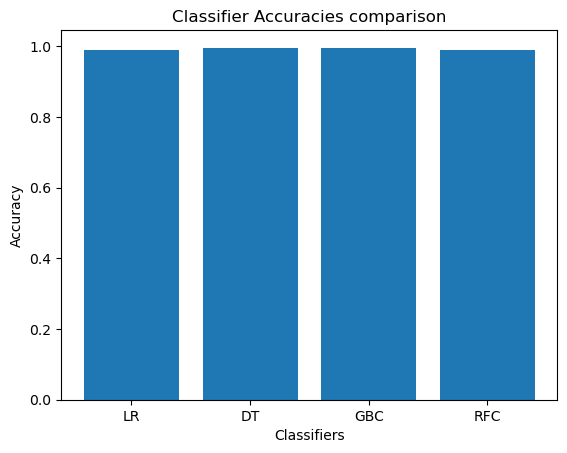

In [59]:
# Define the names of classifiers and their corresponding accuracy scores
classifiers = ['LR', 'DT', 'GBC', 'RFC']
accuracies = [LR_accuracy, DT_accuracy, GBC_accuracy, RFC_accuracy]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies comparison')
plt.show()

In [60]:
news = str(input())
manual_testing(news)

 Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [61]:
news = str(input())
manual_testing(news)

 MINSK (Reuters) - In the shadow of disused Soviet-era factories in Minsk, a street lined with eclectic bars, art galleries and yoga studios has become a haven from the vigilant eyes of the Belarussian authorities.  This place is like an island,  said Yegor, 21, who works at  popular bar Hooligan.  It s the street of freedom.  The government of President Alexander Lukashenko, who has ruled Belarus for the past 23 years and has boasted that he is  the last and only dictator in Europe  ,has little tolerance for any opposition. A powerful police force and feared state security  keep citizens in check. But police patrols are rare in Oktyabrskaya, partly due to its location on an out-of-the-way peninsula in a bend of the river Svislach. When the first restaurant opened there in 2012, few visitors came but now it ranks among the most fashionable quarters of Minsk.  Such is the growing popularity of that Oktyabrskaya that investors such as Belgazprombank, a subsidiary of state-owned Russian l



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News
